# Data Wrangling

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv("data\data_from_api.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,0,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,0,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,0,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


## Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    168 non-null    int64  
 1   Date            168 non-null    object 
 2   BoosterVersion  168 non-null    object 
 3   PayloadMass     146 non-null    float64
 4   Orbit           167 non-null    object 
 5   LaunchSite      168 non-null    object 
 6   Outcome         168 non-null    int64  
 7   Flights         168 non-null    int64  
 8   GridFins        168 non-null    bool   
 9   Reused          168 non-null    bool   
 10  Legs            168 non-null    bool   
 11  LandingPad      142 non-null    object 
 12  Block           168 non-null    float64
 13  ReusedCount     168 non-null    int64  
 14  Serial          168 non-null    object 
 15  Longitude       168 non-null    float64
 16  Latitude        168 non-null    float64
dtypes: bool(3), float64(4), int64(4), o

In [4]:
categorical_variables = [col for col in df.columns if df[col].dtypes == 'O']
numerical_variables = [col for col in df.columns if df[col].dtypes != 'O']

print(f'The dataset has {len(categorical_variables)} categorical variables: {categorical_variables}')
print(f'The dataset has {len(numerical_variables)} numerical variables: {numerical_variables}')

The dataset has 6 categorical variables: ['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'LandingPad', 'Serial']
The dataset has 11 numerical variables: ['FlightNumber', 'PayloadMass', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Longitude', 'Latitude']


## Converting Date from object to date

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    168 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 KB


## Missing Values

In [7]:
df.isna().sum(axis=0)

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass       22
Orbit              1
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

### Imputing Missing PayloadMass

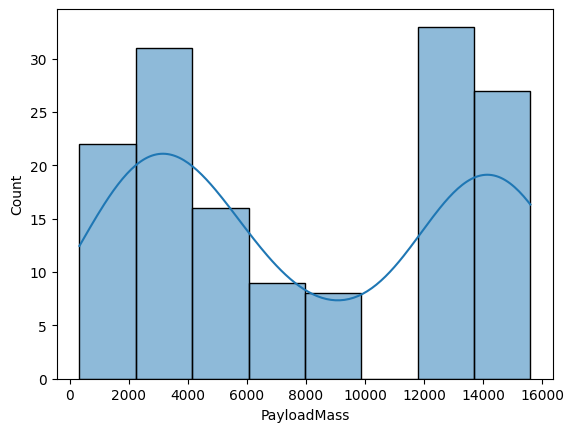

In [8]:
sns.histplot(df['PayloadMass'], bins= 8, kde=True)
plt.show()

The histogram for payload mass shows a multi-modal distribution, indicating that SpaceX launches a variety of missions with distinct mass requirements. There isn't a single most common payload mass.

For the EDA stage, we will use the mean to impute missing payload mass values for simplicity. Later, during model building, we will apply KNNImputer for a more robust imputation approach.

In [9]:
print(df['PayloadMass'].mean())
print(df['PayloadMass'].median())
df[['PayloadMass']].describe()

8191.079109589042
6780.5


,PayloadMass
count,146.000000
mean,8191.079110
std,5521.332964
min,330.000000
25%,3025.000000
50%,6780.500000
75%,13260.000000
max,15600.000000


In [10]:
df['PayloadMass'].skew()

np.float64(0.10767111993981028)

In [11]:
df['PayloadMass'] = df['PayloadMass'].fillna(df['PayloadMass'].mean())

#### Imputing Missing LandingPad

In [12]:
df['LandingPad'].value_counts(dropna= False)

LandingPad
LZ-1      57
OCISLY    39
NaN       26
JRTI      20
LZ-2      18
LZ-4       6
ASOG       2
Name: count, dtype: int64

Here, NaN does not indicate missing values, but boosters without a landing pad

In [13]:
df['LandingPad'] = df['LandingPad'].fillna('No Pad')

In [14]:
df['LandingPad'].value_counts(dropna= False)

LandingPad
LZ-1      57
OCISLY    39
No Pad    26
JRTI      20
LZ-2      18
LZ-4       6
ASOG       2
Name: count, dtype: int64

### Imputing Missing Orbit

In [15]:
df['Orbit'].value_counts()

Orbit
VLEO     54
ISS      32
GTO      31
LEO      14
PO       13
SSO      11
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
SO        1
Name: count, dtype: int64

In [16]:
df[df['Orbit'].isna()]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
95,112,2020-12-19,Falcon 9,8191.07911,NaN,KSC LC 39A,1,5,True,True,True,LZ-2,5.0,5,B1059,-80.603956,28.608058


From NextSpaceFlight, we can see that for this flight, the Orbit and PayloadMass details were initially undisclosed. Later, the orbit details were shown as Low Earth Orbit(LEO)
Source: https://nextspaceflight.com/launches/details/5112

In [17]:
df.loc[95, 'Orbit'] = "LEO"

## Duplicated Values

In [18]:
df.duplicated().sum()

np.int64(0)

There is no duplicate entries in the data.

## Saving data to csv

In [20]:
df.to_csv('data/data_cleaned.csv', header= True, index= False)